# Numpy Curve fit with $1$ & $3\sigma$ Uncertainties

This notebook creates some noise on top of an exponential decay (which is treated as fake data),
uses scipy's curve_fit routing to find the best fit values and associated uncertainties. Then, I create all 8 unique possible fits allowed by the 3 parameters $\pm$ uncertainties, calculate the standard deviation of their values at each time (x-axis), and use this to plot 1 $\sigma$ curves and $3\sigma$ error bars in order to help the user
visualize the uncertainty on the fit.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a*np.exp(-b*x) + c

# user provides LaTeX code for function for later use:
fitEquation = r"$\displaystyle\mathrm{fit} =  a e^{-b t} + c$"

N=100
x = np.linspace(0,4, N) ## I arbitrarily used N = 100 points
dx = (max(x) - min(x))/N
y = func(x, 2.5, 1.3, 0.5)  # base function
yn = y + 0.2*np.random.normal(size=len(x))  # noise added
popt, pcov = curve_fit(func, x, yn)  # popt = OPTimal Parameters for fit; COVariance matrix
print('fit params = ',popt)
sigma = np.sqrt([pcov[0,0], pcov[1,1], pcov[2,2]]) # sqrt(diag elements) of pcov are the 1 sigma deviations
print('sigma values = ', sigma)

fit params =  [2.38601924 1.26359086 0.50287546]
sigma values =  [0.08765909 0.10096971 0.03899334]


This next cell is crudely done, and I just wanted an answer.  
(TODO:) No doubt I could generalize this code so that it looked at the number of parameters  
in the user-supplied fit function, and it then worked out all the combinatorial possibilities  
for fit curves. 

In [2]:
values = np.array([
    func(x, popt[0] + sigma[0], popt[1] + sigma[1], popt[2] + sigma[2]), 
    func(x, popt[0] + sigma[0], popt[1] - sigma[1], popt[2] + sigma[2]),   
    func(x, popt[0] + sigma[0], popt[1] + sigma[1], popt[2] - sigma[2]), 
    func(x, popt[0] + sigma[0], popt[1] - sigma[1], popt[2] - sigma[2]), 
    func(x, popt[0] - sigma[0], popt[1] + sigma[1], popt[2] + sigma[2]), 
    func(x, popt[0] - sigma[0], popt[1] - sigma[1], popt[2] + sigma[2]),
    func(x, popt[0] - sigma[0], popt[1] + sigma[1], popt[2] - sigma[2]), 
    func(x, popt[0] - sigma[0], popt[1] - sigma[1], popt[2] - sigma[2]) 
    ])

In [5]:
#print(values)
for i in range(len(values)):
    print(values[ : ,0])

[3.01554712 3.01554712 2.93756045 2.93756045 2.84022895 2.84022895
 2.76224228 2.76224228]
[3.01554712 3.01554712 2.93756045 2.93756045 2.84022895 2.84022895
 2.76224228 2.76224228]
[3.01554712 3.01554712 2.93756045 2.93756045 2.84022895 2.84022895
 2.76224228 2.76224228]
[3.01554712 3.01554712 2.93756045 2.93756045 2.84022895 2.84022895
 2.76224228 2.76224228]
[3.01554712 3.01554712 2.93756045 2.93756045 2.84022895 2.84022895
 2.76224228 2.76224228]
[3.01554712 3.01554712 2.93756045 2.93756045 2.84022895 2.84022895
 2.76224228 2.76224228]
[3.01554712 3.01554712 2.93756045 2.93756045 2.84022895 2.84022895
 2.76224228 2.76224228]
[3.01554712 3.01554712 2.93756045 2.93756045 2.84022895 2.84022895
 2.76224228 2.76224228]


In [6]:
# the fit error represents the standard deviation of all the possible fit +- uncertainty
# values at each x position. One could imagine getting the min and max possible deviations,
# but this is a one-line command that is pretty sweetly simple and fast.
#print fitError
fitError = np.std(values, axis=0)

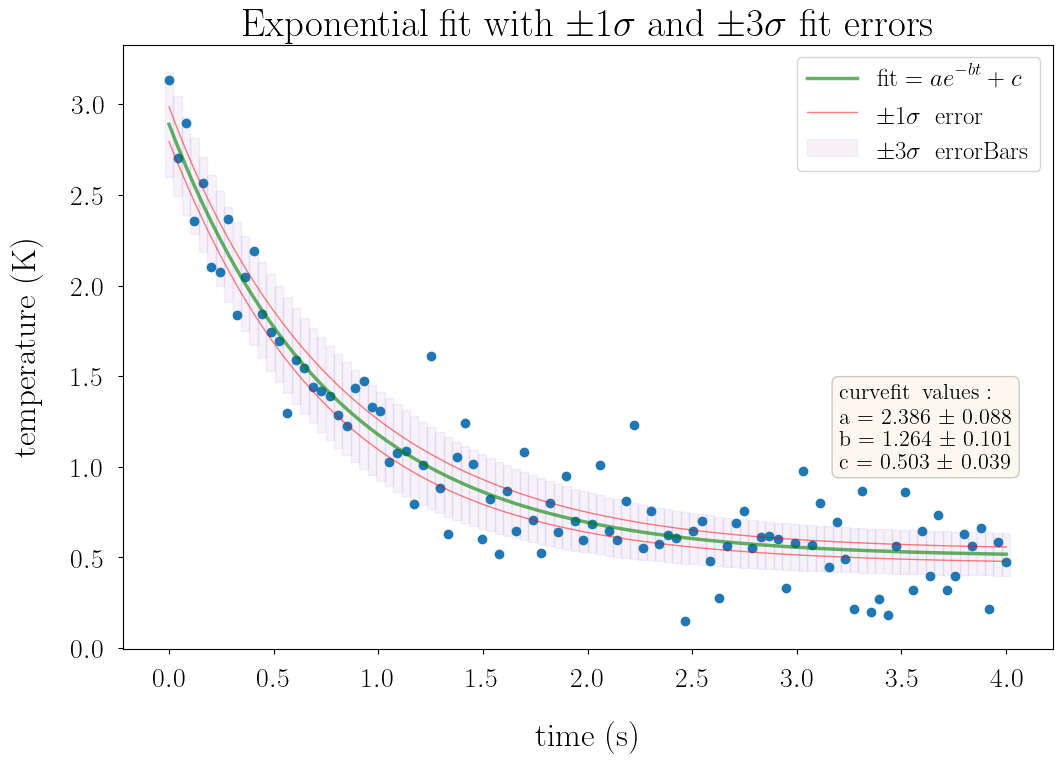

In [32]:
nSigma = 3
import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rc('font', family='serif')
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
matplotlib.rcParams['xtick.major.pad'] = 10
matplotlib.rcParams['ytick.major.pad'] = 10

fig = plt.figure(figsize=(12,8), dpi=100, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20
curveFit = func(x,popt[0], popt[1], popt[2] )
plt.plot(x, yn, 'o')

plt.plot(x, curveFit, 
    linewidth=2.5, 
    color = 'green',
    alpha = 0.6,
    label = fitEquation)

plt.bar(x, 
    height = 2*nSigma*fitError,  #height of bar is twice nSigma
    width=dx, 
    bottom = curveFit - nSigma*fitError, #base of error is nSigma below fit
    orientation = 'vertical', 
    alpha=0.05, 
    color = 'purple',
    edgecolor = 'blue',
    label = r"$\displaystyle \pm 3\sigma\;\;\mathrm{errorBars}$")

plt.plot(x, curveFit+fitError, 
    linewidth = 1.0, 
    alpha = 0.5, 
    color = 'red',
    label = r"$\displaystyle  \pm 1\sigma\;\;\mathrm{error}$")

plt.plot(x, curveFit-fitError, 
    linewidth = 1.0, 
    alpha = 0.5, 
    color = 'red')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.2)
plt.text(3.2, 1.0, 
    ("$\mathrm{curve fit\;\;values:\;}$\n a = %.3f\t $\pm$ %.3f\n b = %.3f\t $\pm$ %.3f \n c = %.3f\t $\pm$ %.3f" 
    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
plt.xlabel(r'\textrm{time (s)}', fontsize=24)
plt.ylabel(r'\textrm{temperature (K)}',fontsize=24)
plt.title(r"Exponential fit with $\pm 1\sigma$ and $\pm 3\sigma$ fit errors",
      fontsize=28, color='k')
ax.legend(fontsize=18)
plt.savefig('3sigmaPlot.pdf',  dpi=600)
plt.show()

#### Some references

Although I created this plot style myself, here's a nice page  
at the matplotlib site that shows other fancy techniques for  
visualizing data: http://matplotlib.org/users/recipes.html  
You can, of course, also see the matplotlib users guide at  
http://matplotlib.org/users/index.html